In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading and understanding the data

In [2]:
Lead_score=pd.read_csv("Leads.csv")

In [3]:
Lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
Lead_score.shape

(9240, 37)

In [5]:
Lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
Lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning 

In [7]:
# Check the percentage of missing value in each column.

round(100*(Lead_score.isnull().sum()/len(Lead_score.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
Lead_score.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [9]:
Lead_score["How did you hear about X Education"].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [10]:
Lead_score["Lead Profile"].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [11]:
Lead_score.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [12]:
# These column have a value called select that means customer has not selected any options for these columns while entering the data.
# Converting 'Select' values to NaN.
Lead_score["Specialization"]=Lead_score["Specialization"].replace('Select',np.nan)
Lead_score["How did you hear about X Education"]=Lead_score["How did you hear about X Education"].replace('Select',np.nan)
Lead_score["Lead Profile"]=Lead_score["Lead Profile"].replace('Select',np.nan)
Lead_score["City"]=Lead_score["City"].replace('Select',np.nan)

In [13]:
missing_values=round(100*(Lead_score.isnull().sum()/len(Lead_score.index)),2)
print(missing_values)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Dropping The column which have greater than 40% null values

In [14]:
null_cols=Lead_score.isnull().sum()

In [15]:
null_col_names=list(null_cols[null_cols>(40*9240//100)].index)

In [16]:
null_col_names

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [17]:
# now we can drop the columns which have more than 45% missing values
df=Lead_score.drop(columns=null_col_names)

In [18]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


### Finding columns which have less than or equal to 13% of null values

In [19]:
less_null_cols_names=list(null_cols[(null_cols>0) & (null_cols<=13/100*(len(df)))].index)
len(less_null_cols_names)
less_null_cols_names

['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity']

In [20]:
dict={}
for i in less_null_cols_names:
    dict[i]=df[i].isnull().sum()
print(dict)

{'Lead Source': 36, 'TotalVisits': 137, 'Page Views Per Visit': 137, 'Last Activity': 103}


In [21]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
youtubechannel          1
Pay per Click Ads       1
testone                 1
NC_EDM                  1
WeLearn                 1
blog                    1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [22]:
# From above we can see that Google appears twice with different cases, so we convert all the values with 'Google' to the same case.
# Maximum values has Google so Impute null values with Google.

df['Lead Source']=df['Lead Source'].replace('google','Google')
df['Lead Source']=df['Lead Source'].replace(np.nan,'Google')

In [23]:
# There are different types of  small % values are present so we conclude it with social media.

df['Lead Source']=df['Lead Source'].replace(['Facebook','bing','Click2call','Press_Release','Live Chat','blog','Pay per Click Ads','welearnblog_Home',
                                             'youtubechannel','testone','NC_EDM','WeLearn'],'Social Media')

In [24]:
df['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          78
Name: Lead Source, dtype: int64

In [25]:
#check the median of the column
df['TotalVisits'].median()

3.0

In [26]:
#imputing  the null values in TotalVisits by the median value which is 3.0.

df['TotalVisits']=df['TotalVisits'].replace(np.nan,df['TotalVisits'].median())

In [27]:
#check the median of the column
df['Page Views Per Visit'].median()

2.0

In [28]:
#imputing  the null values in Page Views Per Visit by the median value which is 2.0.
df['Page Views Per Visit']=df['Page Views Per Visit'].replace(np.nan,df['Page Views Per Visit'].median())

In [29]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [30]:
# In the Last activity column Maximum values has Email Opened so Impute null values with Email Opened.
df['Last Activity']=df['Last Activity'].replace(np.nan,'Email Opened')

In [31]:
# There are different types of  small % values are present so we conclude it with others.

df['Last Activity']=df['Last Activity'].replace(['Olark Chat Conversation','Page Visited on Website','Converted to Lead',
                                                'Email Bounced','Email Link Clicked','Form Submitted on Website',
                                                'Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                'View in browser link Clicked','Email Received','Email Marked Spam',
                                                'Resubscribed to emails','Visited Booth in Tradeshow'],'Others')

In [32]:
df.shape

(9240, 30)

In [33]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [34]:
# In the What is your current occupation column Maximum values has Unemployed so Impute null values with Unemployed.
df['What is your current occupation']=df['What is your current occupation'].replace(np.nan,'Unemployed')

In [35]:
# There are different types of  small % values are present so we conclude it with Management and Business_specailist
df.Specialization=df.Specialization.replace(['Finance Management','Human Resource Management',
                                            'Marketing Management','Operations Management',
                                            'IT Projects Management','Supply Chain Management',
                                            'Healthcare Management','Hospitality Management',
                                            'Retail Management'],'Management')

df.Specialization=df.Specialization.replace(['International Business','Rural and Agribusiness','E-Business'],'Business_Specialisation')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [37]:
df.Specialization.value_counts()

Management                           4253
Business Administration               403
Banking, Investment And Insurance     338
Business_Specialisation               308
Travel and Tourism                    203
Media and Advertising                 203
E-COMMERCE                            112
Services Excellence                    40
Name: Specialization, dtype: int64

In [38]:
#we do not have any information of what the Specialization of the customer have, we can add a new category 
# called 'Not Mentioned' for the null values.
df.Specialization=df.Specialization.replace(np.nan,'Not Mentioned')

In [39]:
df.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [40]:
#df.City=df.City.replace(['Thane & Outskirts','Other Cities','Other Cities of Maharashtra',
#                         'Other Metro Cities','Tier II Cities'],'Other Cities of Maharashtra')

df=df.drop('City',1)

In [41]:
#check the percentage of India as value in the country column.
India_percent=(100*len(df[df['Country']=='India'])/len(df['Country']))
India_percent

70.25974025974025

In [42]:
# "India" occurs around 70% of times in the Country column & 'country' column also has around 27% as missing values, 
# so we have to drop this column
df=df.drop(['Country'],axis=1)


In [43]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [44]:
#check the percentage of Better Career Prospects as value in the What matters most to you in choosing a course column.
Better_careerpercent=(100*len(df[df['What matters most to you in choosing a course']=='Better Career Prospects'])/len(df['What matters most to you in choosing a course']))
Better_careerpercent

70.64935064935065

In [45]:
# "Better Career Prospects" occurs around 71% of times in the 'What matters most to you in choosing a course' column,& 'What matters most to you in choosing a course' column also has around 29% as missing values, 
# so we have to drop this column

df=df.drop(['What matters most to you in choosing a course'],axis=1)


In [46]:
# Since the following columns have only one value "No" in all the rows, we can drop the columns :
df = df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque','X Education Forums'], axis=1)

In [47]:
# we have to drop Tags,Last Notable Activity and last activity column because this column having data by sales Team

df=df.drop(['Tags'],axis=1)
df=df.drop(['Last Notable Activity'],axis=1)
df=df.drop(['Last Activity'],axis=1)


In [48]:
df.shape

(9240, 18)

In [49]:
missing_values=round(100*(df.isnull().sum()/len(df.index)),2)
print(missing_values)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
dtype: float64


### Outlier Treatment

In [50]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


From the above we can see there is outliers in TotalVisits & Page Views Per Visits

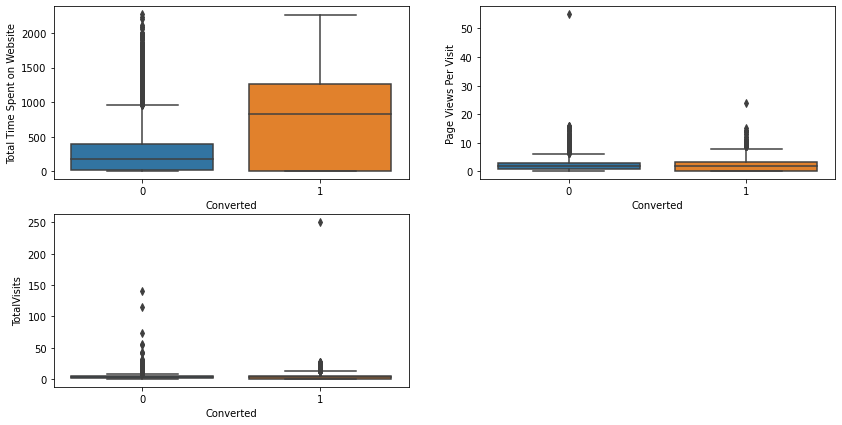

In [51]:
plt.figure(figsize=[14,7])
plt.subplot(221)
sns.boxplot(y=df['Total Time Spent on Website'],x=df.Converted)
plt.subplot(222)
sns.boxplot(y=df['Page Views Per Visit'],x=df.Converted)
plt.subplot(223)
sns.boxplot(y=df['TotalVisits'],x=df.Converted)
plt.show()

People who are sending more time on websites are prone to conversion. Outliers are present in for the ones not converting which means there are some people who are spending more time but still not taking the course.

For total number of visits, the median value is almost same for both athough the upper quantile is higher for the ones converting. Also there are outliers present here.

For Page Views per visits, the median value is almost same for both. There is one outlier who has visited a lot pages every time he/she visits but has not converted yet.

In [52]:
# dropping the values beyond 99% for 'Total Visits'

quartile_totalvisits = df['TotalVisits'].quantile(0.99)
df = df[df["TotalVisits"] < quartile_totalvisits ]
df["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [53]:
# dropping the values beyond 99% for 'Page Views Per Visit'

quartile_Pagevisits = df['TotalVisits'].quantile(0.99)
df = df[df["TotalVisits"] < quartile_Pagevisits ]
df["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9018.000000
mean        3.030827
std         2.634461
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
90%         7.000000
95%         8.000000
99%        11.000000
max        12.000000
Name: TotalVisits, dtype: float64

In [54]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9018.000000,9018.000000,9018.000000,9018.000000,9018.000000
mean,617209.426813,0.383899,3.030827,482.138612,2.283840
std,23410.935630,0.486361,2.634461,546.405287,1.960459
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596495.000000,0.000000,1.000000,7.000000,1.000000
50%,615545.000000,0.000000,3.000000,244.000000,2.000000
75%,637393.250000,1.000000,4.000000,923.750000,3.000000
90%,650492.800000,1.000000,7.000000,1375.300000,5.000000
95%,655404.150000,1.000000,8.000000,1557.000000,6.000000
99%,659596.940000,1.000000,11.000000,1839.830000,8.830000


In [55]:
round(100*(len(df)/9240),2)


97.6

At this point data has been cleaned and 97.6% data has been  retained

## Imbalance checking

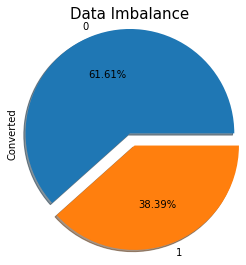

In [56]:
df.Converted.value_counts(normalize=True).plot.pie(radius=1.2,autopct='%0.2f%%',shadow='True',explode=[0,0.15])
plt.title('Data Imbalance',fontsize=15)
plt.show()

lead conversion rate is less.

## EDA

In [57]:
df.select_dtypes("object").columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object')

In [58]:
df.select_dtypes("int64").columns

Index(['Lead Number', 'Converted', 'Total Time Spent on Website'], dtype='object')

In [59]:
df.select_dtypes("float").columns

Index(['TotalVisits', 'Page Views Per Visit'], dtype='object')

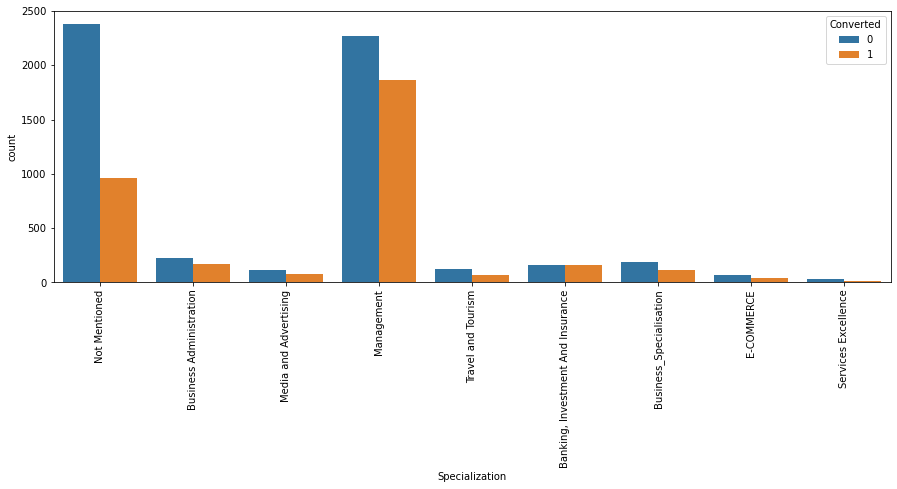

In [60]:
# Specialization
plt.figure(figsize=[15,5])
sns.countplot(df['Specialization'],hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

Banking, Investment and Insurance has better conversion rate. Management specializations come next.

In [61]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview'],
      dtype='object')

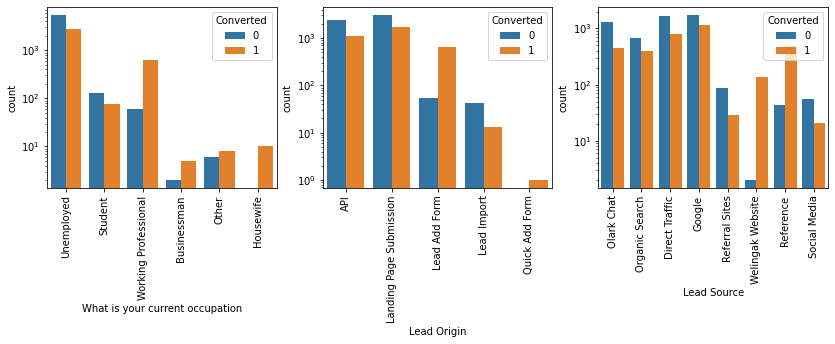

In [62]:
plt.figure(figsize=[14,10])
plt.subplot(231)
sns.countplot(df['What is your current occupation'],hue=df.Converted)
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplots_adjust(hspace=1.0)
plt.subplot(232)
sns.countplot(df['Lead Origin'],hue=df.Converted)
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplot(233)
sns.countplot(df['Lead Source'],hue=df.Converted)
plt.xticks(rotation=90)
plt.yscale('log')


Working professionals and housewives have better conversion ratio than the others. 

Unemployed people and students have a slightly higher percentage of not converting. 

Businessman have a fairly higher percentage of joining the course provided.

People using reference, Wellingak Website have a higher chance of converting.

Lead Add form has a higher conversion ratio.

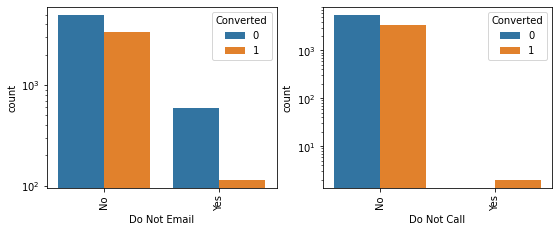

In [63]:
plt.figure(figsize=[14,10])
plt.subplot(231)
sns.countplot(df['Do Not Email'],hue=df.Converted)
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplots_adjust(hspace=1.0)
plt.subplot(232)
sns.countplot(df['Do Not Call'],hue=df.Converted)
plt.xticks(rotation=90)
plt.yscale('log')



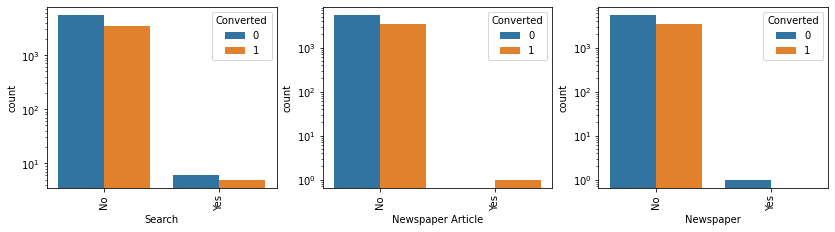

In [64]:
plt.figure(figsize=[14,10])
plt.subplot(231)
sns.countplot(df['Search'],hue=df.Converted)
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplots_adjust(hspace=1.0)
plt.subplot(232)
sns.countplot(df['Newspaper Article'],hue=df.Converted)
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplot(233)
sns.countplot(df['Newspaper'],hue=df.Converted)
plt.xticks(rotation=90)
plt.yscale('log')

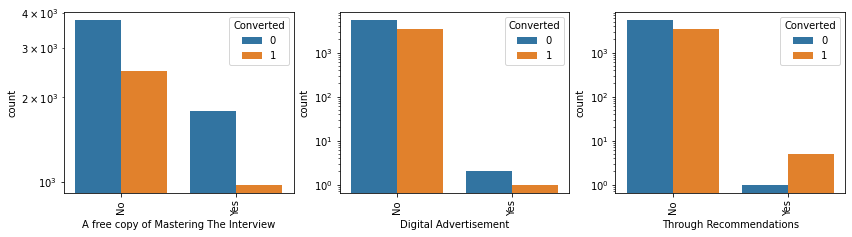

In [65]:
plt.figure(figsize=[14,10])
plt.subplot(231)
sns.countplot(df['A free copy of Mastering The Interview'],hue=df.Converted)
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplots_adjust(hspace=1.0)
plt.subplot(232)
sns.countplot(df['Digital Advertisement'],hue=df.Converted)
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplot(233)
sns.countplot(df['Through Recommendations'],hue=df.Converted)
plt.xticks(rotation=90)
plt.yscale('log')

In [66]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [67]:
res_df=df[['Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit','Specialization', 'What is your current occupation','Search',
       'Newspaper Article', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview']]
res_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Not Mentioned,Unemployed,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Not Mentioned,Unemployed,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Student,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,Unemployed,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Not Mentioned,Unemployed,No,No,No,No,No,No


<AxesSubplot:>

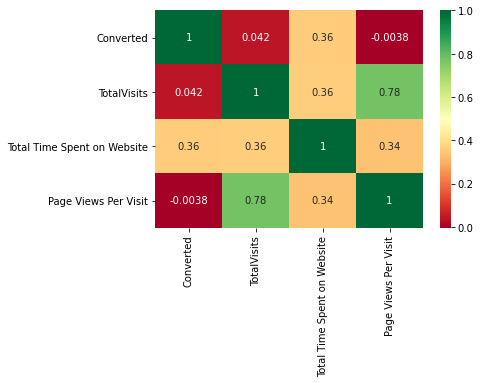

In [68]:
sns.heatmap(res_df.corr(),cmap="RdYlGn",annot=True)

### Data preperation and Creating Dummies 

#### Converting some binary variables (Yes/No) to 0/1

In [69]:

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article','Newspaper','Digital Advertisement',
            'Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
res_df[varlist] = res_df[varlist].apply(binary_map)

In [70]:
res_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9018 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9018 non-null   object 
 1   Lead Source                             9018 non-null   object 
 2   Do Not Email                            9018 non-null   int64  
 3   Do Not Call                             9018 non-null   int64  
 4   Converted                               9018 non-null   int64  
 5   TotalVisits                             9018 non-null   float64
 6   Total Time Spent on Website             9018 non-null   int64  
 7   Page Views Per Visit                    9018 non-null   float64
 8   Specialization                          9018 non-null   object 
 9   What is your current occupation         9018 non-null   object 
 10  Search                                  9018 non-null   int6

In [71]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(res_df[['Lead Source','Lead Origin','Specialization','What is your current occupation']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([res_df, dummy1], axis=1)
leads.shape

(9018, 40)

In [72]:
leads=leads.drop(['Lead Source','Lead Origin','Specialization','What is your current occupation'],axis=1)
leads.shape

(9018, 36)

In [73]:
leads.info(verbose=None)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9018 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9018 non-null   int64  
 1   Do Not Call                                           9018 non-null   int64  
 2   Converted                                             9018 non-null   int64  
 3   TotalVisits                                           9018 non-null   float64
 4   Total Time Spent on Website                           9018 non-null   int64  
 5   Page Views Per Visit                                  9018 non-null   float64
 6   Search                                                9018 non-null   int64  
 7   Newspaper Article                                     9018 non-null   int64  
 8   Newspaper                                             9018

## Test-Train Split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X = leads.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,...,Specialization_Management,Specialization_Media and Advertising,Specialization_Not Mentioned,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [76]:
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [77]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Rescaling the features with MinMax Scaling

In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,...,Specialization_Management,Specialization_Media and Advertising,Specialization_Not Mentioned,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
2853,0,0,0.500000,0.421655,0.500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6804,1,0,0.250000,0.023768,0.125000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6591,0,0,0.166667,0.500880,0.166667,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4922,0,0,0.250000,0.766725,0.250000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5931,0,0,0.250000,0.562060,0.250000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [79]:
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

38.3898868928809

That means we have almost 38% conversion rate.

### Model Building

In [80]:
import statsmodels.api as sm

## Feature Selection Using RFE

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [82]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)  
rfe = rfe.fit(X_train, y_train)

In [83]:
rfe.support_

array([ True, False,  True,  True, False, False, False,  True, False,
       False, False, False,  True, False, False,  True, False,  True,
        True,  True, False, False, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True])

In [84]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Search', False, 14),
 ('Newspaper Article', False, 2),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 8),
 ('Through Recommendations', False, 4),
 ('A free copy of Mastering The Interview', False, 6),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 12),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 21),
 ('Lead Origin_Quick Add Form', False, 10),
 ('Specialization_Business Administration', False, 19),
 ('Specialization_Business_Specialisation', False, 11),
 ('Specialization_E-COMMERCE', False, 18),
 ('S

In [85]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Newspaper', 'Lead Source_Olark Chat', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Specialization_Not Mentioned',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [86]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Page Views Per Visit', 'Search', 'Newspaper Article',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Specialization_Business Administration',
       'Specialization_Business_Specialisation', 'Specialization_E-COMMERCE',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism'],
      dtype='object')

##### Assessing the model with StatsModels

In [87]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6312
Model:                            GLM   Df Residuals:                     6296
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2929.8
Date:                Mon, 12 Apr 2021   Deviance:                       5859.7
Time:                        18:58:38   Pearson chi2:                 9.10e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6146      1.010     -0.609      0.543      -2.594       1.364
Do Not Email                                            -1.4022      0.161     -8.687      0.000      -1.719      -1.086
TotalVisits                                              0.7122      0.188      3.796      0.000       0.344       1.080
Total Time Spent on Website                              4.3851      0.158     27.738      0.000       4.075       4.695
Newspaper                                              -24.4444   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_Olark Chat                                   0.9047      0.121      7.493      0.000       0.668       1.141
Lead Source_Referral Sites                              -0.6772      0.334     -2.026      0.043      -1.332      -0.022
Lead Source_Welingak Website                             3.1932      1.028      3.107      0.002       1.179       5.208
Lead Origin_Landing Page Submission                     -0.8999      0.122     -7.399      0.000      -1.138      -0.662
Lead Origin_Lead Add Form                                3.7773      0.219     17.271      0.000       3.349       4.206
Specialization_Not Mentioned                            -0.9921      0.118     -8.430      0.000      -1.223      -0.761
What is your current occupation_Housewife               21.8627   1.43e+04      0.002      0.999    -2.8e+04    2.81e+04
What is your current occupation_Other                   -1.9138      1.308     -1.463      0.143      -4.477       0.649
What is your current occupation_Student                 -0.7162      1.027     -0.697      0.486      -2.729       1.296
What is your current occupation_Unemployed              -0.6980      1.003     -0.696      0.487      -2.665       1.269
What is your current occupation_Working Professional     1.9825      1.019      1.946      0.052      -0.014       3.979
========================================================================================================================
"""

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,16.63
7,Lead Origin_Landing Page Submission,7.24
9,Specialization_Not Mentioned,4.78
1,TotalVisits,3.95
4,Lead Source_Olark Chat,2.58
2,Total Time Spent on Website,2.27
14,What is your current occupation_Working Profes...,2.14
8,Lead Origin_Lead Add Form,2.12
12,What is your current occupation_Student,1.39
6,Lead Source_Welingak Website,1.33


#### Dropping the variable and updating the model
As we can see from the summary and the VIF dataframe, some variables are insignificant. One of these variables is 
`What is your current occupation_Unemployed`, it has a very high p-value of 0.487 as well as very high vif 16.63.so we will drop this variable.

In [89]:
col = col.drop('What is your current occupation_Unemployed',1)

### Model 2

In [90]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6312
Model:                            GLM   Df Residuals:                     6297
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2930.1
Date:                Mon, 12 Apr 2021   Deviance:                       5860.2
Time:                        18:58:39   Pearson chi2:                 9.11e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3098      0.142     -9.201      0.000      -1.589      -1.031
Do Not Email                                            -1.4029      0.161     -8.691      0.000      -1.719      -1.087
TotalVisits                                              0.7124      0.188      3.797      0.000       0.345       1.080
Total Time Spent on Website                              4.3860      0.158     27.748      0.000       4.076       4.696
Newspaper                                              -24.4455   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_Olark Chat                                   0.9046      0.121      7.492      0.000       0.668       1.141
Lead Source_Referral Sites                              -0.6784      0.334     -2.029      0.042      -1.334      -0.023
Lead Source_Welingak Website                             3.1926      1.028      3.106      0.002       1.178       5.207
Lead Origin_Landing Page Submission                     -0.9025      0.122     -7.419      0.000      -1.141      -0.664
Lead Origin_Lead Add Form                                3.7773      0.219     17.272      0.000       3.349       4.206
Specialization_Not Mentioned                            -0.9942      0.118     -8.445      0.000      -1.225      -0.763
What is your current occupation_Housewife               22.5600   1.43e+04      0.002      0.999    -2.8e+04    2.81e+04
What is your current occupation_Other                   -1.2176      0.842     -1.447      0.148      -2.867       0.432
What is your current occupation_Student                 -0.0190      0.224     -0.085      0.932      -0.457       0.419
What is your current occupation_Working Professional     2.6796      0.183     14.640      0.000       2.321       3.038
========================================================================================================================
"""

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
1,TotalVisits,3.18
7,Lead Origin_Landing Page Submission,2.95
9,Specialization_Not Mentioned,2.32
2,Total Time Spent on Website,2.10
4,Lead Source_Olark Chat,1.85
8,Lead Origin_Lead Add Form,1.43
6,Lead Source_Welingak Website,1.31
13,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11
5,Lead Source_Referral Sites,1.05


#### Dropping the variable and updating the model
As we can see from the summary and the VIF dataframe, some variables are insignificant. One of these variables is 
`Newspaper`, it has a very high p-value of 1.000.so we will drop this variable.

In [92]:
col = col.drop('Newspaper',1)

## Model 3

In [93]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6312
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2932.1
Date:                Mon, 12 Apr 2021   Deviance:                       5864.2
Time:                        18:58:39   Pearson chi2:                 9.09e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3019      0.142     -9.153      0.000      -1.581      -1.023
Do Not Email                                            -1.4016      0.161     -8.687      0.000      -1.718      -1.085
TotalVisits                                              0.6985      0.187      3.726      0.000       0.331       1.066
Total Time Spent on Website                              4.3760      0.158     27.716      0.000       4.067       4.686
Lead Source_Olark Chat                                   0.8981      0.121      7.446      0.000       0.662       1.134
Lead Source_Referral Sites                              -0.6758      0.334     -2.023      0.043      -1.331      -0.021
Lead Source_Welingak Website                             3.1926      1.028      3.106      0.002       1.178       5.207
Lead Origin_Landing Page Submission                     -0.9039      0.122     -7.433      0.000      -1.142      -0.666
Lead Origin_Lead Add Form                                3.7703      0.219     17.246      0.000       3.342       4.199
Specialization_Not Mentioned                            -0.9953      0.118     -8.457      0.000      -1.226      -0.765
What is your current occupation_Housewife               22.5584   1.43e+04      0.002      0.999    -2.8e+04    2.81e+04
What is your current occupation_Other                   -1.2132      0.842     -1.441      0.149      -2.863       0.437
What is your current occupation_Student                 -0.0182      0.223     -0.081      0.935      -0.456       0.420
What is your current occupation_Working Professional     2.6798      0.183     14.644      0.000       2.321       3.038
========================================================================================================================
"""

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
1,TotalVisits,3.18
6,Lead Origin_Landing Page Submission,2.95
8,Specialization_Not Mentioned,2.32
2,Total Time Spent on Website,2.10
3,Lead Source_Olark Chat,1.85
7,Lead Origin_Lead Add Form,1.43
5,Lead Source_Welingak Website,1.31
12,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11
4,Lead Source_Referral Sites,1.05


#### Dropping the variable and updating the model
As we can see from the summary and the VIF dataframe, some variables are insignificant. One of these variables is 
`What is your current occupation_Housewife`, it has a very high p-value of 0.999.so we will drop this variable.

In [95]:
col = col.drop('What is your current occupation_Housewife',1)

## Model 4

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6312
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2936.5
Date:                Mon, 12 Apr 2021   Deviance:                       5873.1
Time:                        18:58:39   Pearson chi2:                 9.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2944      0.142     -9.107      0.000      -1.573      -1.016
Do Not Email                                            -1.4053      0.161     -8.711      0.000      -1.721      -1.089
TotalVisits                                              0.6897      0.187      3.681      0.000       0.323       1.057
Total Time Spent on Website                              4.3697      0.158     27.697      0.000       4.061       4.679
Lead Source_Olark Chat                                   0.8942      0.121      7.418      0.000       0.658       1.130
Lead Source_Referral Sites                              -0.6749      0.334     -2.021      0.043      -1.329      -0.020
Lead Source_Welingak Website                             3.1850      1.028      3.099      0.002       1.171       5.200
Lead Origin_Landing Page Submission                     -0.9016      0.122     -7.418      0.000      -1.140      -0.663
Lead Origin_Lead Add Form                                3.7749      0.218     17.282      0.000       3.347       4.203
Specialization_Not Mentioned                            -0.9988      0.118     -8.491      0.000      -1.229      -0.768
What is your current occupation_Other                   -1.2148      0.842     -1.443      0.149      -2.865       0.435
What is your current occupation_Student                 -0.0213      0.223     -0.095      0.924      -0.459       0.417
What is your current occupation_Working Professional     2.6753      0.183     14.622      0.000       2.317       3.034
========================================================================================================================
"""

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
1,TotalVisits,3.18
6,Lead Origin_Landing Page Submission,2.94
8,Specialization_Not Mentioned,2.32
2,Total Time Spent on Website,2.10
3,Lead Source_Olark Chat,1.85
7,Lead Origin_Lead Add Form,1.42
5,Lead Source_Welingak Website,1.31
11,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11
4,Lead Source_Referral Sites,1.05


#### Dropping the variable and updating the model
As we can see from the summary and the VIF dataframe, some variables are insignificant. One of these variables is `What is your current occupation_Student`, it has a very high p-value of 0.924.so we will drop this variable.

In [98]:
col=col.drop('What is your current occupation_Student',1)

### Model 5

In [99]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6312
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2936.5
Date:                Mon, 12 Apr 2021   Deviance:                       5873.1
Time:                        18:58:39   Pearson chi2:                 9.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2951      0.142     -9.121      0.000      -1.573      -1.017
Do Not Email                                            -1.4052      0.161     -8.711      0.000      -1.721      -1.089
TotalVisits                                              0.6900      0.187      3.683      0.000       0.323       1.057
Total Time Spent on Website                              4.3697      0.158     27.697      0.000       4.061       4.679
Lead Source_Olark Chat                                   0.8940      0.121      7.417      0.000       0.658       1.130
Lead Source_Referral Sites                              -0.6746      0.334     -2.020      0.043      -1.329      -0.020
Lead Source_Welingak Website                             3.1853      1.028      3.099      0.002       1.171       5.200
Lead Origin_Landing Page Submission                     -0.9015      0.122     -7.418      0.000      -1.140      -0.663
Lead Origin_Lead Add Form                                3.7748      0.218     17.281      0.000       3.347       4.203
Specialization_Not Mentioned                            -0.9986      0.118     -8.491      0.000      -1.229      -0.768
What is your current occupation_Other                   -1.2143      0.842     -1.442      0.149      -2.864       0.436
What is your current occupation_Working Professional     2.6758      0.183     14.631      0.000       2.317       3.034
========================================================================================================================
"""

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,3.18
6,Lead Origin_Landing Page Submission,2.93
8,Specialization_Not Mentioned,2.32
2,Total Time Spent on Website,2.10
3,Lead Source_Olark Chat,1.85
7,Lead Origin_Lead Add Form,1.41
5,Lead Source_Welingak Website,1.31
10,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11
4,Lead Source_Referral Sites,1.05


#### Dropping the variable and updating the model
As we can see from the summary and the VIF dataframe, some variables are insignificant. One of these variables is `What is your current occupation_Other`, it has a very high p-value of 0.149.so we will drop this variable.

In [101]:
col = col.drop('What is your current occupation_Other',1)

### Model 6

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6312
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2937.7
Date:                Mon, 12 Apr 2021   Deviance:                       5875.3
Time:                        18:58:39   Pearson chi2:                 9.08e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2979      0.142     -9.142      0.000      -1.576      -1.020
Do Not Email                                            -1.4099      0.161     -8.738      0.000      -1.726      -1.094
TotalVisits                                              0.6813      0.187      3.638      0.000       0.314       1.048
Total Time Spent on Website                              4.3637      0.158     27.685      0.000       4.055       4.673
Lead Source_Olark Chat                                   0.8928      0.120      7.410      0.000       0.657       1.129
Lead Source_Referral Sites                              -0.6708      0.334     -2.009      0.045      -1.325      -0.016
Lead Source_Welingak Website                             3.1876      1.028      3.101      0.002       1.173       5.202
Lead Origin_Landing Page Submission                     -0.8958      0.121     -7.373      0.000      -1.134      -0.658
Lead Origin_Lead Add Form                                3.7717      0.218     17.264      0.000       3.343       4.200
Specialization_Not Mentioned                            -0.9932      0.118     -8.450      0.000      -1.224      -0.763
What is your current occupation_Working Professional     2.6781      0.183     14.648      0.000       2.320       3.036
========================================================================================================================
"""

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,3.18
6,Lead Origin_Landing Page Submission,2.93
8,Specialization_Not Mentioned,2.31
2,Total Time Spent on Website,2.10
3,Lead Source_Olark Chat,1.85
7,Lead Origin_Lead Add Form,1.41
5,Lead Source_Welingak Website,1.31
9,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11
4,Lead Source_Referral Sites,1.05


-  After dropping `What is your current occupation_Other` This model looks good & p-value for all the predictors seem to be significant,From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5, now we can consider this is our final model.

In [104]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2853    0.496729
6804    0.034570
6591    0.731323
4922    0.789576
5931    0.605700
7110    0.146692
7910    0.768768
4719    0.700191
5806    0.994245
874     0.816603
dtype: float64

In [105]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.49672938, 0.03457038, 0.73132319, 0.78957571, 0.60570008,
       0.14669226, 0.76876834, 0.70019076, 0.99424467, 0.81660273])

#### Creating a dataframe with the actual converted flag and the predicted probabilities.

In [106]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,1,0.496729,2853
1,0,0.034570,6804
2,1,0.731323,6591
3,1,0.789576,4922
4,1,0.605700,5931


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [107]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,1,0.496729,2853,0
1,0,0.034570,6804,0
2,1,0.731323,6591,1
3,1,0.789576,4922,1
4,1,0.605700,5931,1


#### Now we can check the confusion metrics

In [108]:
from sklearn import metrics

In [109]:
y_train_pred_final.shape

(6312, 4)

In [110]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3394  480]
 [ 875 1563]]


In [111]:
# Predicted     not_converted    converted
# Actual
# not_converted        3394     480
# converted            875      1563

In [112]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7853295310519645


### Metrics beyond simply accuracy

In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [114]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6410992616899097

In [115]:
# Let us calculate specificity

TN / float(TN+FP)

0.876097057305111

In [116]:
# Calculate false postive rate

print(FP/ float(TN+FP))

0.12390294269488901


In [117]:
# positive predictive value 

print (TP / float(TP+FP))

0.7650513950073421


In [118]:
# Negative predictive value

print (TN / float(TN+ FN))

0.7950339657999531


### Step 9: Plotting the ROC Curve
#### An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [119]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [120]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

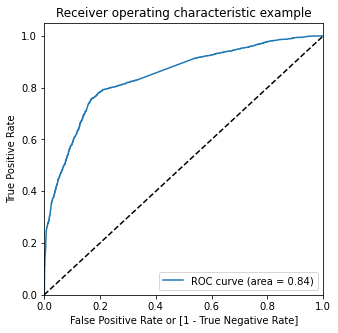

In [121]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [122]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.496729,2853,0,1,1,1,1,1,0,0,0,0,0
1,0,0.034570,6804,0,1,0,0,0,0,0,0,0,0,0
2,1,0.731323,6591,1,1,1,1,1,1,1,1,1,0,0
3,1,0.789576,4922,1,1,1,1,1,1,1,1,1,0,0
4,1,0.605700,5931,1,1,1,1,1,1,1,1,0,0,0


In [123]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386248  1.000000  0.000000
0.1   0.1  0.447560  0.993027  0.104285
0.2   0.2  0.730355  0.830599  0.667269
0.3   0.3  0.795152  0.780148  0.804595
0.4   0.4  0.800539  0.732158  0.843573
0.5   0.5  0.785330  0.641099  0.876097
0.6   0.6  0.770596  0.539787  0.915849
0.7   0.7  0.753485  0.439295  0.951213
0.8   0.8  0.731464  0.344545  0.974961
0.9   0.9  0.707858  0.257998  0.990965


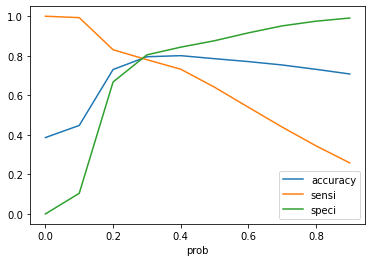

In [124]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the above curve, 0.3 is the optimum point to take it as a cutoff probablity.

In [125]:
# Let us make the final prediction using 0.3 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.496729,2853,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.034570,6804,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.731323,6591,1,1,1,1,1,1,1,1,1,0,0,1
3,1,0.789576,4922,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.605700,5931,1,1,1,1,1,1,1,1,0,0,0,1


In [126]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,1,0.496729,2853,0,1,1,1,1,1,0,0,0,0,0,1,50
1,0,0.034570,6804,0,1,0,0,0,0,0,0,0,0,0,0,3
2,1,0.731323,6591,1,1,1,1,1,1,1,1,1,0,0,1,73
3,1,0.789576,4922,1,1,1,1,1,1,1,1,1,0,0,1,79
4,1,0.605700,5931,1,1,1,1,1,1,1,1,0,0,0,1,61
5,0,0.146692,7110,0,1,1,0,0,0,0,0,0,0,0,0,15
6,1,0.768768,7910,1,1,1,1,1,1,1,1,1,0,0,1,77
7,1,0.700191,4719,1,1,1,1,1,1,1,1,1,0,0,1,70
8,1,0.994245,5806,1,1,1,1,1,1,1,1,1,1,1,1,99
9,1,0.816603,874,1,1,1,1,1,1,1,1,1,1,0,1,82


In [127]:
y_train_pred_final.final_predicted.value_counts()

0    3653
1    2659
Name: final_predicted, dtype: int64

In [128]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1902
0     536
Name: final_predicted, dtype: int64

In [129]:
# check the precentage of final_predicted conversions

1902/float(1902+536)

0.7801476620180475

In [130]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7951520912547528

In [131]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3117,  757],
       [ 536, 1902]], dtype=int64)

In [132]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [133]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7801476620180475

In [134]:
# Let us calculate specificity

TN / float(TN+FP)

0.8045947341249354

In [135]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.19540526587506454


In [136]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7153065062053403


In [137]:
# Negative predictive value

print (TN / float(TN+ FN))

0.853271283876266


#### Metrics - Precision and Recall

In [138]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3394,  480],
       [ 875, 1563]], dtype=int64)

In [139]:
from sklearn.metrics import precision_score, recall_score

In [140]:

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7650513950073421

In [141]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6410992616899097

### Precision and recall tradeoff

In [142]:
from sklearn.metrics import precision_recall_curve

In [143]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       1
 3       1
 4       1
        ..
 6307    0
 6308    1
 6309    1
 6310    1
 6311    1
 Name: Converted, Length: 6312, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6307    0
 6308    1
 6309    1
 6310    1
 6311    0
 Name: predicted, Length: 6312, dtype: int64)

In [144]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

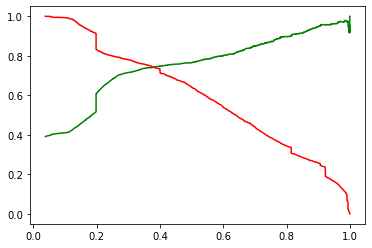

In [145]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Making predictions on the test set

In [146]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [147]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Specialization_Not Mentioned,What is your current occupation_Working Professional
5114,0,0.333333,0.049736,0,0,0,1,0,0,0
6913,0,0.250000,0.697183,0,0,0,0,0,0,1
1451,0,0.333333,0.206426,0,0,0,1,0,0,0
6506,0,0.000000,0.000000,1,0,0,0,0,1,0
4587,0,0.000000,0.000000,1,0,0,0,0,1,0


In [148]:
X_test_sm = sm.add_constant(X_test)

Making prediction on the Test set

In [149]:
y_test_pred = res.predict(X_test_sm)

In [150]:
y_test_pred[:10]

5114    0.148101
6913    0.989977
1451    0.256198
6506    0.198077
4587    0.198077
7915    0.972570
3939    0.117564
6128    0.144913
8058    0.014131
4192    0.186160
dtype: float64

In [151]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [152]:
# Let's see the head

y_pred_1.head()

,0
5114,0.148101
6913,0.989977
1451,0.256198
6506,0.198077
4587,0.198077


In [153]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [154]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [155]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [156]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [157]:
y_pred_final.head()

,Converted,LeadId,0
0,0,5114,0.148101
1,1,6913,0.989977
2,0,1451,0.256198
3,0,6506,0.198077
4,1,4587,0.198077


In [158]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})


In [159]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['LeadId','Converted','Converted_Prob'], axis=1)

In [160]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,5114,0,0.148101
1,6913,1,0.989977
2,1451,0,0.256198
3,6506,0,0.198077
4,4587,1,0.198077


In [161]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.3%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [162]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,5114,0,0.148101,0
1,6913,1,0.989977,1
2,1451,0,0.256198,0
3,6506,0,0.198077,0
4,4587,1,0.198077,0


In [163]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,5114,0,0.148101,0,15
1,6913,1,0.989977,1,99
2,1451,0,0.256198,0,26
3,6506,0,0.198077,0,20
4,4587,1,0.198077,0,20
5,7915,1,0.972570,1,97
6,3939,0,0.117564,0,12
7,6128,0,0.144913,0,14
8,8058,0,0.014131,0,1
9,4192,0,0.186160,0,19


In [164]:
checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    807
0    217
Name: final_predicted, dtype: int64

In [165]:
# check the precentage of final_predicted conversions.
807/float(807+217)

0.7880859375

In [166]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7960088691796009

In [167]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1347,  335],
       [ 217,  807]], dtype=int64)

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [169]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7880859375

In [170]:
# Let us calculate specificity
TN / float(TN+FP)

0.8008323424494649

#### Precision and Recall metrics for the test set

In [171]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7066549912434326
recall  0.7880859375


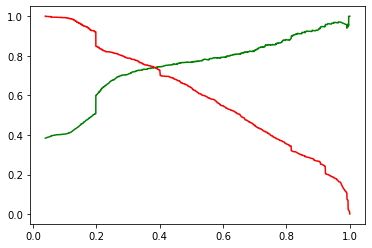

In [172]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Conclusion :

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal 
  cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 80%, 79% and 80% which are approximately closer to 
  the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 79%
 

 As per our final Model, the top 3 predictor variables that influences the conversion rate.---- (1)`Total Time Spent on Website` - A coefficient value of `4.3637`.(2)`Lead Origin_Lead Add Form`  - A coefficient value of `3.7717`.(3)`Lead Source_Welingak Website` - A coefficient value of `3.186`.